# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import datetime as dt

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

637

In [4]:
# created this for verification of names
# city_df = pd.DataFrame(cities)
# city_df

,0
0,bluffton
1,mataura
2,albany
3,buqayq
4,jinchang
...,...
632,darhan
633,semey
634,toul
635,mabay


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
#Build the query URL for openweathermap
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
#define empty lists to hold data and later convert to dataframe
city_name = []
lat = []
lng = []
max_temp = []
humid = []
cloud = []
wind = []
country = []
date = []
x = 1 #set counter for counting cities in print statement
#loop through all cities and request data
print("Beginning Data Retrieval")
print("-----------------------------")
for city in cities:
    response = requests.get(query_url + city).json()
    #print(response)
    try:
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humid.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])

        print(f"Processing Record {x} | {city}")
        x = x + 1
    
    except KeyError:
        print("City not found. Skipping...")
    time.sleep(1)  # Added a one second interval to stay within API query limits

Beginning Data Retrieval
-----------------------------
Processing Record 1 | bluffton
Processing Record 2 | mataura
Processing Record 3 | albany
City not found. Skipping...
Processing Record 4 | jinchang
Processing Record 5 | punta arenas
Processing Record 6 | thompson
Processing Record 7 | qaanaaq
Processing Record 8 | ushuaia
Processing Record 9 | cape town
Processing Record 10 | waipawa
Processing Record 11 | bluff
Processing Record 12 | banda aceh
Processing Record 13 | rikitea
Processing Record 14 | cosala
City not found. Skipping...
Processing Record 15 | avarua
City not found. Skipping...
Processing Record 16 | nikolskoye
Processing Record 17 | airai
Processing Record 18 | arraial do cabo
Processing Record 19 | iqaluit
Processing Record 20 | talnakh
Processing Record 21 | new norfolk
Processing Record 22 | saint-philippe
Processing Record 23 | benguela
Processing Record 24 | zhangye
Processing Record 25 | yuyao
Processing Record 26 | geraldton
Processing Record 27 | chuy
Process

In [6]:
#create dictionary of data requested above and convert to dataframe
weather_dict = {
    "City": city_name,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Humidity": humid,
    "Cloudiness": cloud,
    "Wind Speed": wind,
    "Country": country,
    "Date": date
}
city_data = pd.DataFrame(weather_dict)
city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluffton,32.24,-80.86,6.67,93,90,3.60,US,1608196116
1,Mataura,-46.19,168.86,12.22,83,96,1.79,NZ,1608196117
2,Albany,42.60,-73.97,-7.78,76,100,0.45,US,1608196118
3,Jinchang,38.50,102.17,-6.79,80,100,0.71,CN,1608196121
4,Punta Arenas,-53.15,-70.92,6.67,70,100,6.70,CL,1608196089


In [13]:
#Starter code for reference
#after 50 records, change the set

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | yerbogachen
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | touba
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | rio grande
Processing Record 7 of Set 1 | ibra
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | nemuro
Processing Record 12 of Set 1 | morgan city
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | kawalu
Processing Record 15 of Set 1 | hami
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | hjallerup
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | rangapara
Processing Record 23 of Set 1 | hithadho

Processing Record 36 of Set 4 | chimbote
Processing Record 37 of Set 4 | kanor
Processing Record 38 of Set 4 | san pedro de uraba
Processing Record 39 of Set 4 | taphan hin
Processing Record 40 of Set 4 | upernavik
Processing Record 41 of Set 4 | matagami
Processing Record 42 of Set 4 | terme
Processing Record 43 of Set 4 | coria
Processing Record 44 of Set 4 | pallasovka
Processing Record 45 of Set 4 | asyut
Processing Record 46 of Set 4 | cockburn town
Processing Record 47 of Set 4 | osypenko
Processing Record 48 of Set 4 | sioux lookout
Processing Record 49 of Set 4 | gotsu
Processing Record 0 of Set 5 | abadan
Processing Record 1 of Set 5 | lewistown
Processing Record 2 of Set 5 | toftir
City not found. Skipping...
Processing Record 3 of Set 5 | fortuna
Processing Record 4 of Set 5 | ostersund
Processing Record 5 of Set 5 | calafell
Processing Record 6 of Set 5 | panguna
Processing Record 7 of Set 5 | nantucket
Processing Record 8 of Set 5 | la ronge
Processing Record 9 of Set 5 | 

City not found. Skipping...
Processing Record 28 of Set 8 | porto walter
Processing Record 29 of Set 8 | horsham
Processing Record 30 of Set 8 | maraa
Processing Record 31 of Set 8 | vila franca do campo
Processing Record 32 of Set 8 | garoua
Processing Record 33 of Set 8 | kampot
Processing Record 34 of Set 8 | marawi
Processing Record 35 of Set 8 | egvekinot
Processing Record 36 of Set 8 | liverpool
Processing Record 37 of Set 8 | sanandaj
Processing Record 38 of Set 8 | tabou
Processing Record 39 of Set 8 | kavieng
Processing Record 40 of Set 8 | cap malheureux
Processing Record 41 of Set 8 | logan
Processing Record 42 of Set 8 | klaksvik
Processing Record 43 of Set 8 | sisimiut
Processing Record 44 of Set 8 | whyalla
Processing Record 45 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 46 of Set 8 | hailar
Processing Record 47 of Set 8 | ajdabiya
Processing Record 48 of Set 8 | saint-georges
Processing Record 49 of Set 8 | hoopstad
Processing Record 0 of Set 9 

Processing Record 19 of Set 12 | barra dos coqueiros
Processing Record 20 of Set 12 | provideniya
Processing Record 21 of Set 12 | norman wells
Processing Record 22 of Set 12 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 23 of Set 12 | follonica
Processing Record 24 of Set 12 | verkhoyansk
Processing Record 25 of Set 12 | henties bay
Processing Record 26 of Set 12 | kudahuvadhoo
Processing Record 27 of Set 12 | bandundu
Processing Record 28 of Set 12 | cascais
Processing Record 29 of Set 12 | dickinson
Processing Record 30 of Set 12 | san benito
Processing Record 31 of Set 12 | kenai
Processing Record 32 of Set 12 | rio pardo de minas
Processing Record 33 of Set 12 | erzin
Processing Record 34 of Set 12 | san carlos del zulia
Processing Record 35 of Set 12 | kyshtovka
Processing Record 36 of Set 12 | zima
Processing Record 37 of Set 12 | khandbari
Processing Record 38 of Set 12 | salyan
Processing Record 39 of Set 12 | saint-joseph
Processing Record 40 of Set 12 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
cities_final = city_data.to_csv("../output_data/cities_final.csv")
city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluffton,32.24,-80.86,6.67,93,90,3.60,US,1608196116
1,Mataura,-46.19,168.86,12.22,83,96,1.79,NZ,1608196117
2,Albany,42.60,-73.97,-7.78,76,100,0.45,US,1608196118
3,Jinchang,38.50,102.17,-6.79,80,100,0.71,CN,1608196121
4,Punta Arenas,-53.15,-70.92,6.67,70,100,6.70,CL,1608196089


In [8]:
#create a new DF removing non-numeric columns - city name and country
reduced_city_data = city_data[["Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Date"]]
#describe the new DF
reduced_city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,5.910000e+02
mean,20.312267,17.810931,11.036396,73.925550,55.641286,3.657699,1.608196e+09
std,32.509993,88.280441,17.054872,21.187969,39.789104,2.722718,2.245043e+02
min,-54.800000,-175.200000,-44.380000,1.000000,0.000000,0.030000,1.608196e+09
25%,-6.220000,-59.525000,0.000000,66.000000,12.000000,1.570000,1.608196e+09
50%,22.890000,24.970000,15.400000,80.000000,75.000000,3.100000,1.608196e+09
75%,47.305000,93.675000,25.000000,89.000000,92.500000,5.100000,1.608197e+09
max,78.220000,178.420000,40.060000,100.000000,100.000000,25.030000,1.608197e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
#check which cities have Humidity > 100%
city_data["Humidity"] > 100

0      False
1      False
2      False
3      False
4      False
       ...  
586    False
587    False
588    False
589    False
590    False
Name: Humidity, Length: 591, dtype: bool

In [14]:
#  Get the indices of cities that have humidity over 100%.
humid_cities = city_data[city_data["Humidity"] > 100].index
humid_cities 
#Does not seem to have cities with humidity greater than 100
#However it does have cities with humidity equal to 100 which have been retained

Int64Index([], dtype='int64')

In [16]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data.drop(humid_cities, inplace = False)
clean_city_data.count()
clean_city_data.head() #remains the same as the earlier df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluffton,32.24,-80.86,6.67,93,90,3.60,US,1608196116
1,Mataura,-46.19,168.86,12.22,83,96,1.79,NZ,1608196117
2,Albany,42.60,-73.97,-7.78,76,100,0.45,US,1608196118
3,Jinchang,38.50,102.17,-6.79,80,100,0.71,CN,1608196121
4,Punta Arenas,-53.15,-70.92,6.67,70,100,6.70,CL,1608196089


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [34]:
#Get today's date (referred from stack overflow)
now = dt.datetime.today().strftime("%m/%d/%Y")
print(now)

12/17/2020


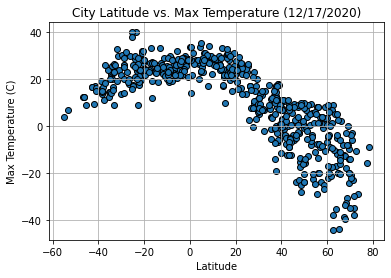

In [37]:
#scatter plot
plt.figure()
x_values = clean_city_data["Lat"]
y_values = clean_city_data["Max Temp"]
plt.scatter(x_values, y_values,edgecolor="black")
plt.title(f"City Latitude vs. Max Temperature ({now})")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)
plt.savefig('../Images/latitude_vs_temp.png')

**Observations**
Latitude and temperature appear to show a negative correlation, i.e., as the distance from the equator (latitude = 0) increases, the maximum temperatures tend to start falling

## Latitude vs. Humidity Plot

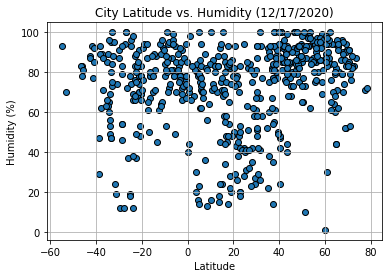

In [39]:
plt.figure()
x_values = clean_city_data["Lat"]
y_values = clean_city_data["Humidity"]
plt.scatter(x_values, y_values,edgecolor="black")
plt.title(f"City Latitude vs. Humidity ({now})")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.savefig('../Images/latitude_vs_humidity.png')

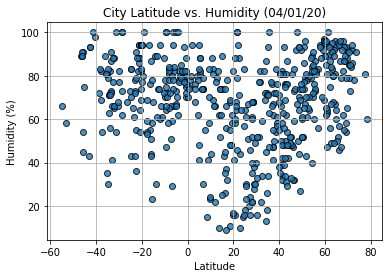

In [11]:
#starter code - for reference

## Latitude vs. Cloudiness Plot

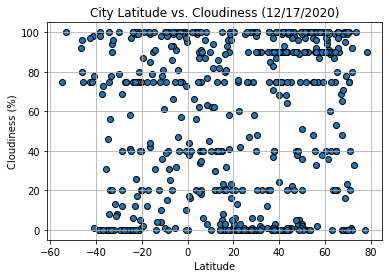

In [41]:
plt.figure()
x_values = clean_city_data["Lat"]
y_values = clean_city_data["Cloudiness"]
plt.scatter(x_values, y_values,edgecolor="black")
plt.title(f"City Latitude vs. Cloudiness ({now})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
plt.savefig('../Images/latitude_vs_cloud.png')

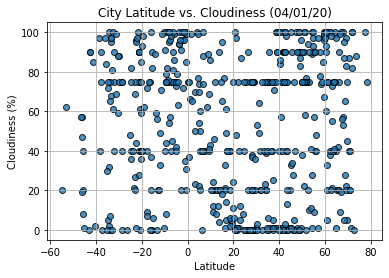

In [12]:
#starter code - for reference

## Latitude vs. Wind Speed Plot

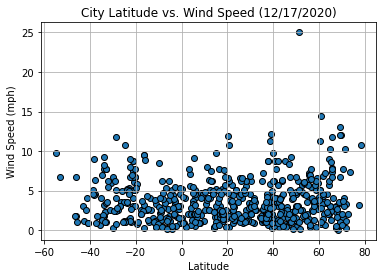

<Figure size 432x288 with 0 Axes>

In [42]:
plt.figure()
x_values = clean_city_data["Lat"]
y_values = clean_city_data["Wind Speed"]
plt.scatter(x_values, y_values,edgecolor="black")
plt.title(f"City Latitude vs. Wind Speed ({now})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)
plt.show()
plt.savefig('../Images/latitude_vs_wind.png')

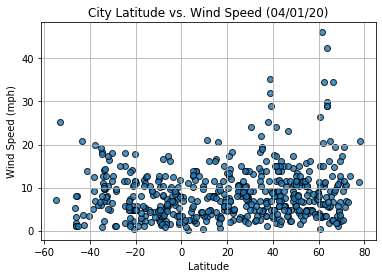

In [13]:
#starter code - for reference

## Linear Regression

In [44]:
#separate the plots into Northern Hemisphere (greater than or equal to 0 degrees latitude) 
#Southern Hemisphere (less than 0 degrees latitude)
northern = clean_city_data.loc[clean_city_data["Lat"] >= 0]
southern = clean_city_data.loc[clean_city_data["Lat"] < 0]
northern
southern

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Mataura,-46.19,168.86,12.22,83,96,1.79,NZ,1608196117
4,Punta Arenas,-53.15,-70.92,6.67,70,100,6.70,CL,1608196089
7,Ushuaia,-54.80,-68.30,4.00,93,75,9.80,AR,1608196126
8,Cape Town,-33.93,18.42,22.22,56,0,9.30,ZA,1608196127
9,Waipawa,-41.41,175.52,17.00,77,98,4.10,NZ,1608196128
...,...,...,...,...,...,...,...,...,...
570,Taltal,-25.40,-70.48,15.63,78,58,1.01,CL,1608196862
572,Walvis Bay,-22.96,14.51,20.00,68,75,4.60,NA,1608196864
575,Tairua,-37.02,175.85,18.33,87,0,1.79,NZ,1608196868
580,Kasongo-Lunda,-6.47,16.82,21.85,94,100,1.22,CD,1608196874


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7162273511337174


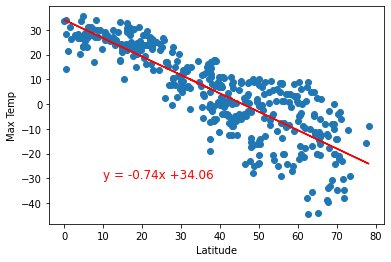

In [55]:
plt.figure()
x_north = northern["Lat"]
y_north = northern["Max Temp"]

# Linear regression on max temp vs. lat
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_north, y_north)

# Get regression values
regress_values = x_north * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#scatter plot
plt.scatter(x_north, y_north)
plt.plot(x_north,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(10,-30),fontsize=12,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

#Save figure
plt.savefig('../Images/latitude_vs_temp_north_regression.png')

The r-value is: 0.46937863826630627


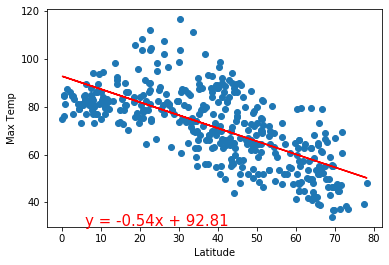

In [25]:
#starter code - for reference

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.2606728522819961


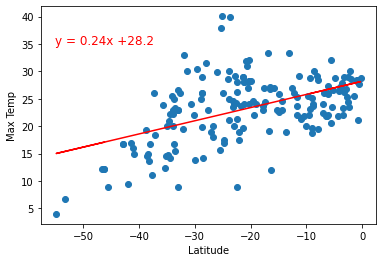

In [56]:
plt.figure()
x_south = southern["Lat"]
y_south = southern["Max Temp"]

# Linear regression on max temp vs. lat
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_south, y_south)

# Get regression values
regress_values = x_south * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#scatter plot
plt.scatter(x_south, y_south)
plt.plot(x_south,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(-55,35),fontsize=12,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save figure
plt.savefig('../Images/latitude_vs_temp_south_regression.png')

The r-value is: 0.6082708688906918


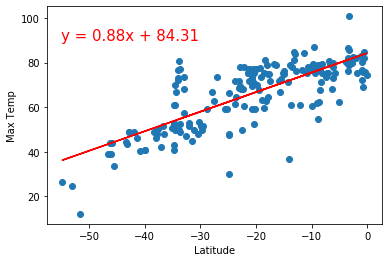

In [26]:
#starter code - for reference

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.13348918175627522


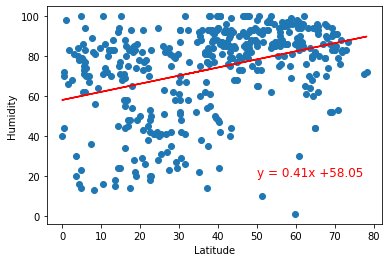

In [48]:
plt.figure()
x_north = northern["Lat"]
y_north = northern["Humidity"]

# Linear regression on humidity vs. lat
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_north, y_north)

# Get regression values
regress_values = x_north * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#scatter plot
plt.scatter(x_north, y_north)
plt.plot(x_north,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(50,20),fontsize=12,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save figure
plt.savefig('../Images/latitude_vs_humidity_north_regression.png')

The r-value is: 0.000543987878808455


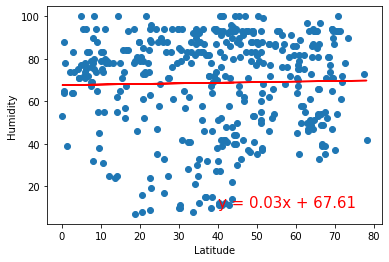

In [27]:
#starter code - for reference

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.023234507116205286


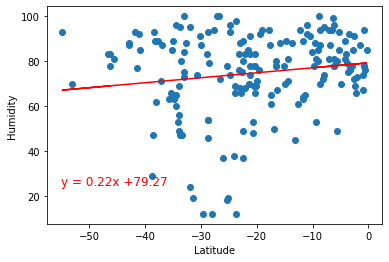

In [49]:
plt.figure()
x_south = southern["Lat"]
y_south = southern["Humidity"]

# Linear regression on Humidity vs. lat
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_south, y_south)

# Get regression values
regress_values = x_south * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#scatter plot
plt.scatter(x_south, y_south)
plt.plot(x_south,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(-55,25),fontsize=12,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save figure
plt.savefig('../Images/latitude_vs_humidity_south_regression.png')

The r-value is: 0.014985174297345524


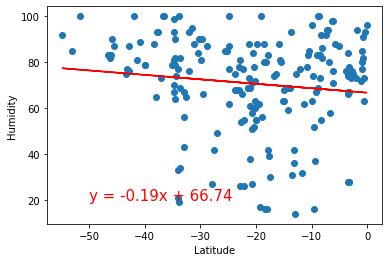

In [28]:
#starter code - for reference

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.062069803904160885


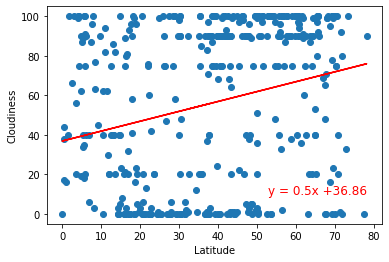

In [50]:
plt.figure()
x_north = northern["Lat"]
y_north = northern["Cloudiness"]

# Linear regression on Cloudiness vs. lat
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_north, y_north)

# Get regression values
regress_values = x_north * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#scatter plot
plt.scatter(x_north, y_north)
plt.plot(x_north,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(53,10),fontsize=12,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save figure
plt.savefig('../Images/lat_vs_cloudiness_north_regression.png')

The r-value is: 0.0020898727664228514


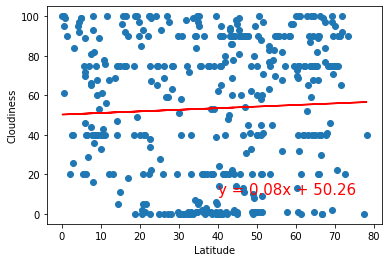

In [29]:
#starter code - for reference

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.046581111520798954


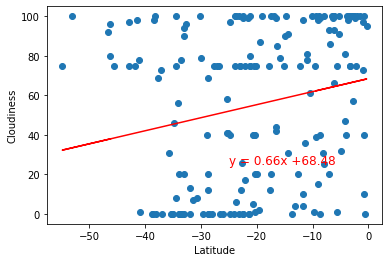

In [51]:
plt.figure()
x_south = southern["Lat"]
y_south = southern["Cloudiness"]

# Linear regression on Cloudiness vs. lat
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_south, y_south)

# Get regression values
regress_values = x_south * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#scatter plot
plt.scatter(x_south, y_south)
plt.plot(x_south,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(-25,25),fontsize=12,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save figure
plt.savefig('../Images/lat_vs_cloud_south_regression.png')

The r-value is: 0.0035263772085582894


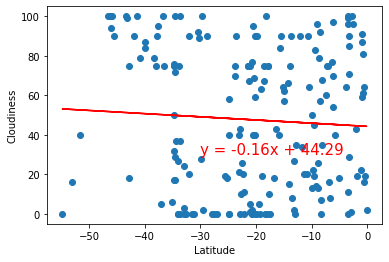

In [30]:
#starter code - for reference

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.015676064734253137


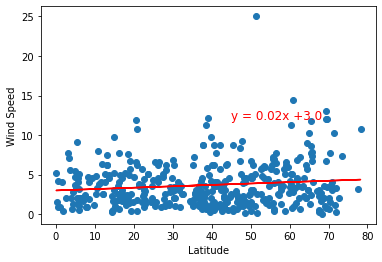

In [52]:
plt.figure()
x_north = northern["Lat"]
y_north = northern["Wind Speed"]

# Linear regression on Wind Speed vs. lat
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_north, y_north)

# Get regression values
regress_values = x_north * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#scatter plot
plt.scatter(x_north, y_north)
plt.plot(x_north,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(45,12),fontsize=12,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.savefig('../Images/lat_vs_wind_north_regression.png')

The r-value is: 0.04019723576144484


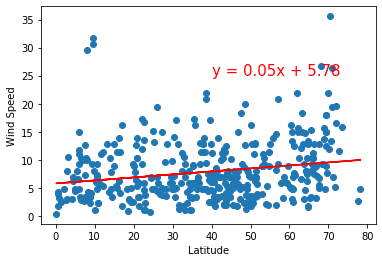

In [31]:
#starter code - for reference

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04114040094567503


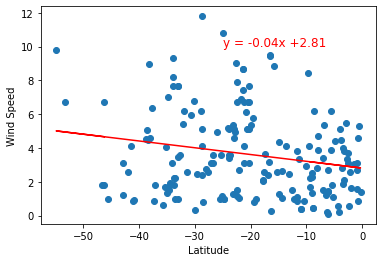

<Figure size 432x288 with 0 Axes>

In [54]:
plt.figure()
x_south = southern["Lat"]
y_south = southern["Wind Speed"]

# Linear regression on Wind Speed vs. lat
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_south, y_south)

# Get regression values
regress_values = x_south * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#scatter plot
plt.scatter(x_south, y_south)
plt.plot(x_south,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(-25,10),fontsize=12,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

#Save figure
plt.savefig('../Images/latitude_vs_wind_south_regression.png')

The r-value is: 0.017128274759839232


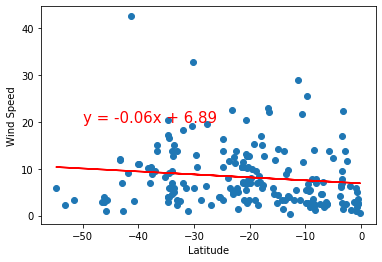

In [32]:
#starter code - for reference